# Supervised learning with scikit learn

01 classification: EDA numerical and visual, k-Nearest neighbors fit, k-nearest neighbors predict,
measuring model performance, train/test split + fit/predict/accuracy, overfitting and underfitting

02 regression: fit and predict for regression, train/test split,cross validation, 5 fold cross validation, k-fold CV comparison, regularized regression, Regularization Lasso, Regularization Ridge

03 fine tuning your model:metrics for classification, logistic regression and the ROC curve, building logistic regression model, plotting a ROC curve, precision-recall Curve, area under ROC curve, AUC computation, hyperparameter tuning with GridSearchCV, RandomizedSearchCV, final evaluation

04 preprocessing pipelines: preprocessing data, exploring categorical features, creating dummy variables, regression with categorical features, handling missing data, dropping missing data, imputing missing data in ML Pipepile, centering and scaling pipeline, pipeline for classification, pipeline for regression


other libraries TensorFlow and keras


#### Iris dataset in scikit-learn

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris=datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [2]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
#exploratory data analysis (EDA)
X = iris.data
y=iris.target
#convert array to data frame
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


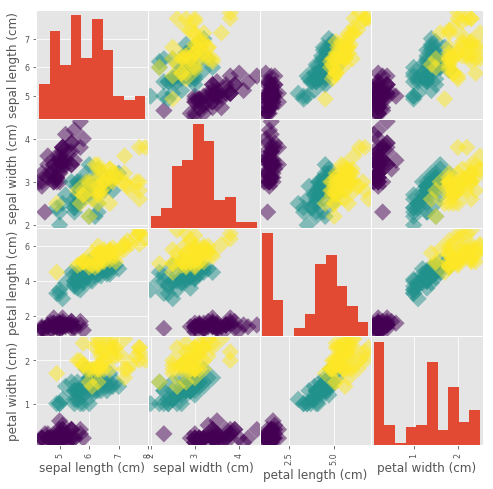

In [10]:
#visual EDA
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df, c=y, figsize=[8,8],
                     s=150, marker='D')

### Classification challenge  K - Nearest Neighbors

Basic idea: predict the label of a data point by
Looking at the 'k' closest labeled data points
taking a majority vote

### Scikit-learn fir and predict
All machine learning models implemented as Python classes
they implement the algorithms for learning and predicting
Store the information learned from the data
Training a model on the data = 'fitting' a model to the data
 .fit()method
 
To predict the labels of new data: .predict() method

### Using scikit-learn to fit a classifier

### KNeighborsClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

iris['data'].shape
iris['target'].shape

(150,)

In [14]:
#predicting on unlabeled data
prediction = knn.predict(X)
X.shape
print('Prediction {}'.format(prediction))

Prediction [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Measuring model performance
In classification, accuracy is a commonly used metric
Accuracy = Fraction of corect predictions
Which data should be used to compute accuracy?
How well will the model perform on new data?

### Measuring model performance
Could compute accuracy on data used to fit classifier
Not indicative of ability to generalize
Split data into training and test set
Fit/Train the classifier on the training set
Make predictions on test set
Compare predictions with the knows labels


### Train / Test split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors = 8)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('test set predictions:\n {}'.format(y_pred))

test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [18]:
#accuracy score
knn.score(X_test,y_test)

0.9555555555555556

#### Model complexity
Larget k = smoother decision boundary = less complex model
Smaller k = more complex model = can lead to overfitting

### Exercises

k-nearest neighbors fit

In [20]:
df = pd.read_csv('party_csv2.csv')
df.head(3)

,party,infants,water,budget,physician,salvador,religious
0,republican,0,1,0,1,1,1
1,republican,0,1,0,1,1,1
2,democrat,0,1,1,0,1,1


In [21]:
'''
k-Nearest Neighbors: Fit
Having explored the Congressional voting records dataset, it is time now to build your 
first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the
voting dataset, which has once again been pre-loaded for you into a DataFrame df.
In the video, Hugo discussed the importance of ensuring your data adheres to the format 
required by the scikit-learn API. The features need to be in an array where each column is a
feature and each row a different observation or data point - in this case, a Congressman's 
voting record. The target needs to be a single column with the same number of observations 
as the feature data. We have done this for you in this exercise. Notice we named the feature
array X and response variable y: This is in accordance with the common scikit-learn practice.
Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the
n_neighbors parameter) and then fit it to the data. The data has been pre-loaded into 
a DataFrame called df.
INSTRUCTIONS
100XP
Import KNeighborsClassifier from sklearn.neighbors.
Create arrays X and y for the features and the target variable. Here this has been 
done for you. Note the use of .drop() to drop the target variable 'party' from the 
feature array X as well as the use of the .values attribute to ensure X and y are NumPy 
arrays. Without using .values, X and y are a DataFrame and Series respectively; 
the scikit-learn API will accept them in this form also as long as they are of the 
right shape.
Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors 
parameter.
Fit the classifier to the data using the .fit() method.
'''
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('party_csv2.csv')
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [23]:
### K nearest neighbors predict
'''
k-Nearest Neighbors: Predict
Having fit a k-NN classifier, you can now use it to predict the label of a new data point.
However, there is no unlabeled data available since all of it was used to fit the model! 
You can still use the .predict() method on the X that was used to fit the model, but it is
not a good indicator of the model's ability to generalize to new, unseen data.
In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled 
data point has been generated and is available to you as X_new. You will use your classifier
to predict the label for this new data point, as well as on the training data X that the 
model has already seen. Using .predict() on X_new will generate 1 prediction, while using 
it on X will generate 435 predictions: 1 for each sample.
The DataFrame has been pre-loaded as df. This time, you will create the feature array X 
and target variable array y yourself.
INSTRUCTIONS
100XP
Create arrays for the features and the target variable from df. As a reminder, the target
variable is 'party'.
Instantiate a KNeighborsClassifier with 6 neighbors.
Fit the classifier to the data.
Predict the labels of the training data, X.
Predict the label of the new data point X_new.
'''
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X)
print("Prediction: {}".format(new_prediction))

Prediction: ['   republican' '   republican' 'democrat' 'democrat' 'democrat'
 'democrat' '   republican' '   republican' '   republican' '    democrat'
 '    republican' '   republican' '    democrat' '     democrat'
 '   republican' '   republican' '    democrat' '    democrat'
 '   republican' '    democrat' '     democrat' '    democrat'
 '    democrat' '    democrat' '     democrat' '     democrat'
 '     democrat' '    democrat' '  republican' '  republican'
 '    democrat' '  republican' '    democrat' '  republican'
 '  republican' '    democrat' '  republican' '  republican'
 '    democrat' '    democrat' '    republican' '    democrat'
 '    democrat' '    democrat' '  republican' 'democrat' '    democrat'
 '    democrat' '    democrat' '    democrat']


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping b

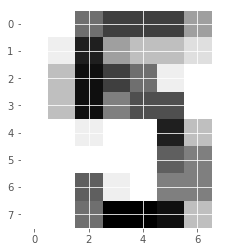

In [24]:
'''
The digits recognition dataset
Up until now, you have been performing binary classification, since the target variable 
had two possible outcomes. Hugo, however, got to perform multi-class classification in the 
videos, where the target variable could take on three possible outcomes. Why does he get to
have all the fun?! In the following exercises, you'll be working with the MNIST digits
recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of
the MN
IST dataset is one of scikit-learn's included datasets, and that is the one we will use in
this exercise.
Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. 
Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of 
black. Recall that scikit-learn's built-in datasets are of type Bunch, which are 
dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 
'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris
data. Because it is a 2D array of the images corresponding to each sample, this 'images'
key is useful for visualizing the images, as you'll see in this exercise (for more on 
plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python).
On the other hand, the 'data' key contains the feature array - that is, the images
as a flattened array of 64 pixels.
Notice that you can access the keys of these Bunch objects in two different ways: By using the
. notation, as in digits.images, or the [] notation, as in digits['images'].
For more on the MNIST data, check out this exercise in Part 1 of DataCamp's Importing Data in
Python course. There, the full version of the MNIST dataset is used, in which the images 
are 28x28. It is a famous dataset in machine learning and computer vision,
and frequently used as a benchmark to evaluate the performance of a new model.
INSTRUCTIONS
100XP
Import datasets from sklearn and matplotlib.pyplot as plt.
Load the digits dataset using the .load_digits() method on datasets.
Print the keys and DESCR of digits.
Print the shape of images and data keys using the . notation.
Display the 1010th image using plt.imshow(). This has been done for you, so hit 
'Submit Answer' to see which handwritten digit this happens to be!
'''
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [25]:
'''
Train/Test Split + Fit/Predict/Accuracy
Now that you have learned about the importance of splitting your data into training 
and test sets, it's time to practice doing this on the digits dataset! After creating 
arrays for the features and target variable, you will split them into training and
test sets, fit a k-NN classifier to the training data, and then compute its accuracy
using the .score() method.
INSTRUCTIONS
100XP
Import KNeighborsClassifier from sklearn.neighbors and train_test_split 
from sklearn.model_selection.
Create an array for the features using digits.data and an array for the target using 
digits.target.
Create stratified training and test sets using 0.2 for the size of the test set. 
Use a random state of 42. Stratify the split according to the labels so that they are
distributed in the training and test sets as they are in the original dataset.
Create a k-NN classifier with 7 neighbors and fit it to the training data.
Compute and print the accuracy of the classifier's predictions using the .score() method..
'''
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

digits = datasets.load_digits()

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Excellent work! Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.

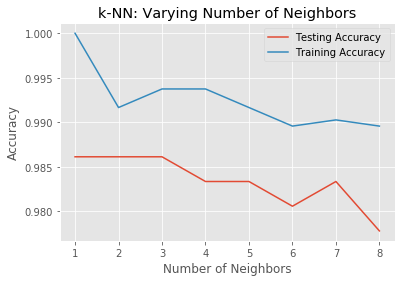

In [26]:
'''
Overfitting and underfitting
Remember the model complexity curve that Hugo showed in the video? You will now construct
such a curve for the digits dataset! In this exercise, you will compute and plot 
the training and testing accuracy scores for a variety of different neighbor values. 
By observing how the accuracy scores differ for the training and testing sets with 
different values of k, you will develop your intuition for overfitting and underfitting.
The training and testing sets are available to you in the workspace as X_train, X_test, 
y_train, y_test. In addition, KNeighborsClassifier has been imported from sklearn.neighbors.
INSTRUCTIONS
100XP
Inside the for loop:
Setup a k-NN classifier with the number of neighbors equal to k.
Fit the classifier with k neighbors to the training data.
Compute accuracy scores the training set and test set separately using the .score()
method and assign the results to the train_accuracy and test_accuracy arrays respectively.
'''
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Great work! It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data. Now that you've grasped the fundamentals of classification, you will learn about regression in the next chapter!


## Regression

Boston housing data

In [34]:
boston = pd.read_csv('boston_housing.csv')
print(boston.head())

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [39]:
#creating feature and target arrays
#features list
X=boston.drop('MEDV', axis=1).values
y=boston['MEDV'].values
x.shape

(506,)

In [40]:
#predicting house value from a single feature
#just number of rooms
X_rooms = X[:,5]
type(X_rooms), type(y)
X_rooms.shape


#y=y.reshape(-1,1)
#X_rooms = X_rooms.reshape(-1,1)
#plotting house value vs number of rooms

#plt.scatter(X_rooms,y)
#plt.ylabel('Value of house /1000 ($)')
#plt.xlabel('Number of rooms')
#plt.show();

(506,)

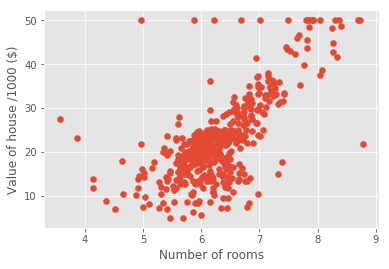

In [41]:
#y=y.reshape(-1,1)
#X_rooms = X_rooms.reshape(-1,1)
#plotting house value vs number of rooms

plt.scatter(X_rooms,x)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

### fitting a regression model


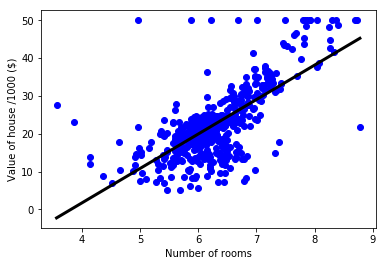

In [8]:
#linear regression on 1 feature, price only depending number of rooms
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

boston = pd.read_csv('boston_housing.csv')

X=boston.drop('MEDV', axis=1).values
X_rooms = X[:,5]
y=boston['MEDV'].values

reg = linear_model.LinearRegression()

#reshape X_rooms and y
y=y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

#linear regression
reg.fit(X_rooms,y)
prediction_space= np.linspace(min(X_rooms),
                             max(X_rooms)).reshape(-1,1)

#### PLOT
#data points as a scatter  plot
plt.scatter(X_rooms, y,color='blue')

#line for regression
plt.plot(prediction_space,reg.predict(prediction_space),
        color='black', linewidth=3)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

#### Regression mechanics

y=ax+b
y=target
x=single feature
a,b - parameter of model

How do we choose a and b?

Define an error function for a givenline
Choose the line that minimizes the error function

#### The loss function
Ordinary least squares (OLS): Minimize sum of squares of residuals

#### Linear regression in higher dimensions
y=a1x1+a2x2+b
To fit a linear regression model here: Need to specify 3 variables
In higher dimensions:
y=a1x1+a2x2+a3x3+anxn+b
Must specify coefficient for each feature and the variable b
Scikit-learn API works exactly the same way:
pass two arrays: features and target

### Linear regression on all features

In [13]:
from sklearn.model_selection import train_test_split

boston = pd.read_csv('boston_housing.csv')

#X- everything apart from price (MEDV)
#y - target price only
X=boston.drop('MEDV', axis=1).values
y=boston['MEDV'].values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred=reg_all.predict(X_test)
reg_all.score(X_test,y_test)

0.7112260057484936

### Cross-validation
Model performance is dependent on way the data is split
not representative of the model's ability to generalize, so split to 5 parts in cross validation
solution: cross-validation

Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

5 folds = 5 - foldCV
10 folds = 10 -foldCV
kfold= k - foldCV
More folds= more computationally expensive

Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.


#### cross-validation in scikit learn
In order to train and test our model using cross-validation, we will use the ‘cross_val_score’ function with a cross-validation value of 5. ‘cross_val_score’ takes in our k-NN model and our data as parameters. Then it splits our data into 5 groups and fits and scores our data 5 seperate times, recording the accuracy score in an array each time. We will save the accuracy scores in the ‘cv_scores’ variable.
To find the average of the 5 scores, we will use numpy’s mean function, passing in ‘cv_score’. Numpy is a useful math library in Python.

In [19]:
from sklearn.model_selection import cross_val_score

reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X,y, cv=5)
print('cv results',cv_results)
print('mean cv results',np.mean(cv_results))

#results of prediction in each part of data

cv results [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
mean cv results 0.35327592439588185


#### Regularized regression

Why regularize?
Recall: Linear regression minimizes a loss function
it chooses a coefficient for each feature variable
large coefficients can lead to overfitting
penalizing large coefficients: Regularization

#### Ridge regression
Loss function = OLS loss function + alpha X sum(i=1 to n()ai^2)
Alpha: parameter we need to choose
Picking alpha is similar to picking k in kNN
Hyperparameter tuning (later)
Alpha controls model complexity
Alpha=0: we get back OLS (can lead to overfitting)
very high alpha: can lead to underfitting

#### Ridge regression in scikit-learn


In [20]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127315

#### Lasso regression
loss function= OLS loss function + alpha * sum(i=1 to n(|ai|))

lasso regression in scikit learn

In [45]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,normalize=True)
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
lasso.score(X_test,y_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Lasso regression for feature selection
can be used to select important features of a dataset
shrinks the coefficients of less important features to exactly 0

#### Lasso for feature selection in scikit learn

by looking at graph pretty obvious that number of rooms biggest factor in price

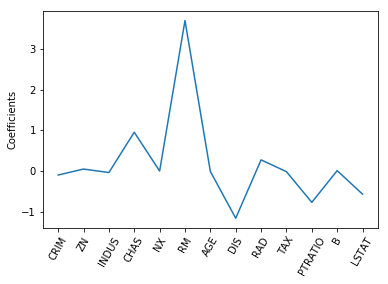

In [22]:
from sklearn.linear_model import Lasso
names = boston.drop('MEDV', axis=1).columns
lasso=Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_
_=plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

### Exercises on regression

In [23]:
#importing data for supervised learning
'''
Importing data for supervised learning
In this chapter, you will work with Gapminder data that we have consolidated into one CSV
file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use
this data to predict the life expectancy in a given country based on features such as the 
country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been
preprocessed.
Since the target variable here is quantitative, this is a regression problem. To begin,
you will fit a linear regression with just one feature: 'fertility', which is the average
number of children a woman in a given country gives birth to. In later exercises, you will
use all the features to build regression models.
Before that, however, you need to import the data and get it into the form needed by
scikit-learn. This involves creating feature and target variable arrays. Furthermore,
since you are going to use only one feature to begin with, you need to do some
reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping 
right now, but it is something you will have to do occasionally when working with
scikit-learn so it is useful to practice.
INSTRUCTIONS
100XP
Import numpy and pandas as their standard aliases.
Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
Create array X for the 'fertility' feature and array y for the 'life' target variable.
Reshape the arrays by using the .reshape() method and passing in (-1, 1).
'''
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder_tidy.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (10111,)
Dimensions of X before reshaping: (10111,)
Dimensions of y after reshaping: (10111, 1)
Dimensions of X after reshaping: (10111, 1)


0.692982847193993


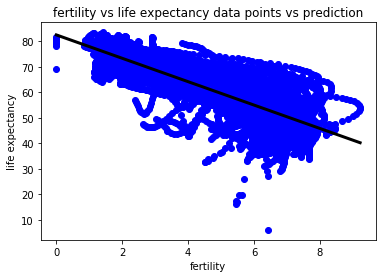

In [33]:
#fit and predict for regression
'''
Fit & predict for regression
Now, you will fit a linear regression and predict life expectancy using just one feature.
You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this 
exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is 
to predict life expectancy, the target variable here is 'life'. The array for the target 
variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as
X_fertility.
A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated.
As you can see, there is a strongly negative correlation, so a linear regression should 
be able to capture this trend. Your job is to fit a linear regression and then predict
the life expectancy, overlaying these predicted values on the plot to generate a regression
line. You will also compute and print the R2
R
2
 score using sckit-learn's .score() method.
INSTRUCTIONS
100XP
Import LinearRegression from sklearn.linear_model.
Create a LinearRegression regressor called reg.
Set up the prediction space to range from the minimum to the maximum of X_fertility.
This has been done for you.
Fit the regressor to the data (X_fertility and y) and compute its predictions using the
.predict() method and the prediction_space array.
Compute and print the R2
R2
 score using the .score() method.
Overlay the plot with your linear regression line. This has been done for you, so hit
'Submit Answer' to see the result!
'''
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

df_nan=df.fillna(0)
X_fertility = df_nan['fertility'].values
y = df_nan['life'].values
# Reshape X and y
X_fertility=X_fertility.reshape(-1,1)
y=y.reshape(-1,1)

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
#data points as a scatter  plot
plt.scatter(X_fertility, y,color='blue')

plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.title('fertility vs life expectancy data points vs prediction')
plt.ylabel('life expectancy')
plt.xlabel('fertility')
plt.show()

In [40]:
'''
Train/test split for regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised
learning model is able to generalize well to new data. This was true for classification models,
and is equally true for linear regression models.
In this exercise, you will split the Gapminder dataset into training and testing sets, and
then fit and predict a linear regression over all features. In addition to computing the R2
R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly
used metric to evaluate regression models. The feature array X and target variable array y
have been pre-loaded for you from the DataFrame df.
INSTRUCTIONS
100XP
Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics,
and train_test_split from sklearn.model_selection.
Using X and y, create training and test sets such that 30% is used for testing and 70%
for training. Use a random state of 42.
Create a linear regression regressor called reg_all, fit it to the training set, and 
evaluate it on the test set.
Compute and print the R2
R
2
 score using the .score() method on the test set.
Compute and print the RMSE. To do this, first compute the Mean Squared Error using 
the mean_squared_error() function with the arguments y_test and y_pred, and then take
its square root using np.sqrt().
'''
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder_tidy.csv')
#fill missing values with 0
df=df.fillna(0)
#remove target and text information
X=df.drop(['life','Country','region'], axis=1).values
y=df['life'].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


#predicting life expectancy from all other factors in table
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
#score
print("R^2: {}".format(reg_all.score(X_test, y_test)))

#RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

#error of prediction of life expectancy


R^2: 0.8440230306573908
Root Mean Squared Error: 4.345061627304978


In [43]:
'''
5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that
is used to train the model, as during the course of training, the model is not only trained, 
but also tested on all of the available data.
In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default,
scikit-learn's cross_val_score() function uses R2
R2 as the metric of choice for regression. Since you are performing 5-fold cross-validation,
 the function will return 5 scores. Your job is to compute these 5 scores and then take their 
 average.
The DataFrame has been loaded as df and split into the feature/target variable arrays X and y.
The modules pandas and numpy have been imported as pd and np, respectively.
INSTRUCTIONS
100XP
Import LinearRegression from sklearn.linear_model and cross_val_score from 
sklearn.model_selection.
Create a linear regression regressor called reg.
Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
Compute and print the average cross-validation score. You can use NumPy's mean() function
to compute the average.
'''
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.83479853 0.89990686 0.80834018 0.90704177 0.80085946]
Average 5-Fold CV Score: 0.8501893589271209


In [44]:
'''
K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more
computationally expensive cross-validation becomes. In this exercise, you will explore
this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold
cross-validation on the Gapminder dataset.
In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared 
to 10-fold CV by executing the following cv=3 and cv=10:
%timeit cross_val_score(reg, X, y, cv = ____)
pandas and numpy are available in the workspace as pd and np. The DataFrame has been
loaded as df and the feature/target variable arrays X and y have been created.
INSTRUCTIONS
100XP
Import LinearRegression from sklearn.linear_model and cross_val_score from 
sklearn.model_selection.
Create a linear regression regressor called reg.
Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.
'''
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8494433008934118
0.8368215802240971


In [64]:
'''
Regularization I: Lasso
In the video, you saw how Lasso selected out the 'RM' feature as being the most important
for predicting Boston house prices, while shrinking the coefficients of certain other features
to 0. Its ability to perform feature selection in this way becomes even more useful when you
are dealing with data involving thousands of features.
In this exercise, you will fit a lasso regression to the Gapminder data you have been working 
with and plot the coefficients. Just as with the Boston data, you will find that the 
coefficients of some features are shrunk to 0, with only the most important ones remaining.
The feature and target variable arrays have been pre-loaded as X and y.
INSTRUCTIONS
100XP
Import Lasso from sklearn.linear_model.
Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
Fit the regressor to the data and compute the coefficients using the coef_ attribute.
Plot the coefficients on the y-axis and column names on the x-axis. This has been done for 
you, so hit 'Submit Answer' to view the plot!
'''
# Import Lasso
from sklearn.linear_model import Lasso

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder_tidy.csv')
#fill missing values with 0
df=df.fillna(1)
#remove target and text information
X=df.drop(['life','Country','region'], axis=1).values
y=df['life'].values

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)


# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.1, normalize=True)

# Fit the regressor to the data
lasso.fit(X_test,y_test)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


[ 0.         -0.11867968  0.         -0.03085827  0.        ]


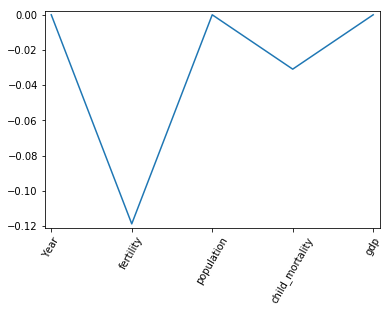

In [65]:
df_drop=df.drop(['Country','region','life'], axis=1)
df_columns=df_drop.columns
df_columns_values=df_drop.columns
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns_values.values, rotation=60)
plt.margins(0.02)
plt.show()

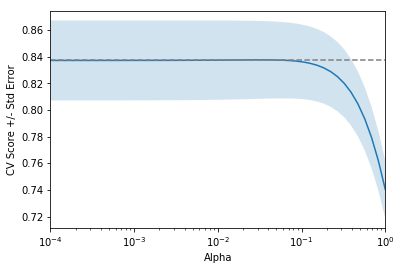

In [3]:
'''
Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression 
should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of
the absolute value of each coefficient multiplied by some alpha. This is also known as L1
L1 regularization because the regularization term is the L1 L1 norm of the coefficients. 
This is not the only way to regularize, however.
If instead you took the sum of the squared values of the coefficients multiplied by some alpha 
- like in Ridge regression - you would be computing the L2
L2  norm. In this exercise, you will practice fitting ridge regression models over a range
 of different alphas, and plot cross-validated R2 R2 scores for each, using this function that we have defined for 
 you, which plots the R2 R2 score as well as standard error for each alpha:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
Don't worry about the specifics of the above function works. The motivation behind this
exercise is for you to see how the R2 R2 score varies with different alphas, and to understand the importance 
of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.
INSTRUCTIONS
100XP
Instantiate a Ridge regressor and specify normalize=True.
Inside the for loop:
Specify the alpha value for the regressor to use.
Perform 10-fold cross-validation on the regressor with the specified alpha. The data is 
available in the arrays X and y.
Append the average and the standard deviation of the computed cross-validated scores.
NumPy has been pre-imported for you as np.
Use the display_plot() function to visualize the scores and standard deviations.
'''
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder_tidy.csv')
#fill missing values with 0
df=df.fillna(1)
#remove target and text information
X=df.drop(['life','Country','region'], axis=1).values
y=df['life'].values


# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

    
    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

## Fine Tunining your model

#### Classification metrics: 
Measuring model performance with accuracy: Fraction of correctly classified samples, not always a useful metric

### Class imbalance example: Emails
Spam classification: 99% of emails are real, 1% are spam
Could build a classifier that predicts ALL emails as real
99% accurate!
but horrible at actually classifying spam
fails at its original purpose
Need more nuanced metrics

#### Diagnosing classification predictions
Confusion matrix: <br>
        actual spam email  true positive  false negative <br>
        actual real email  false positive true negative <br>
        
        
Accuracy: <br>
tp+tn/(tp+tn+fp+fn)<br>

#### metrics from the confusion matrix
precision:
tp/(tp+fp)

recall:
tp/(tp+fn)

f1 score:
2* precision*recall/(precision+recall)

F1 Score is needed when you want to seek a balance between Precision and Recall.

high precision: not many real emails predicted as spam
high recall: predicted most spam emails correctly


### confusion matrix in scikit-learn

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors=8)

from sklearn import datasets

digits = datasets.load_digits()

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=8)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print('knn_score',knn.score(X_test, y_test))

y_pred=knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))


knn_score 0.9735744089012517
[[71  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0]
 [ 0  2 68  0  0  0  0  1  0  0]
 [ 0  0  0 73  0  0  0  0  0  0]
 [ 0  0  0  0 71  0  0  1  0  0]
 [ 0  0  0  0  0 72  0  0  0  1]
 [ 0  1  0  0  0  0 71  0  0  0]
 [ 0  0  0  0  0  0  0 72  0  0]
 [ 0  5  0  1  0  0  0  1 63  0]
 [ 0  1  0  0  1  0  0  4  0 66]]


In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       0.89      1.00      0.94        73
           2       1.00      0.96      0.98        71
           3       0.99      1.00      0.99        73
           4       0.99      0.99      0.99        72
           5       1.00      0.99      0.99        73
           6       1.00      0.99      0.99        72
           7       0.91      1.00      0.95        72
           8       1.00      0.90      0.95        70
           9       0.99      0.92      0.95        72

   micro avg       0.97      0.97      0.97       719
   macro avg       0.98      0.97      0.97       719
weighted avg       0.98      0.97      0.97       719



### Exercise Metrics for classification


In [3]:
import pandas as pd
house_votes=pd.read_csv('house-votes-84.csv')
house_votes.replace("y", 1,inplace=True)
house_votes.replace("n", 0,inplace=True)
house_votes.head(3)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0


In [6]:
#dropping missing data
import numpy as np
# Convert '?' to NaN
house_votes[house_votes == "?"] = np.nan

# Print the number of NaNs
print(house_votes.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(house_votes.shape))

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(house_votes.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (435, 17)


In [7]:
# Create arrays for the features and the response variable
y = house_votes["party"].values
X = house_votes.drop("party", axis=1).values

In [9]:
'''
Metrics for classification
In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. 
However, as Andy discussed, accuracy is not always an informative metric. In this exercise,
you will dive more deeply into evaluating the performance of binary classifiers by computing 
a confusion matrix and generating a classification report.
You may have noticed in the video that the classification report consisted of three rows, 
and an additional support column. The support gives the number of samples of the true response 
that lie in that class - so in the video example, the support was the number of Republicans
or Democrats in the test set on which the classification report was computed. The precision, 
recall, and f1-score columns, then, gave the respective metrics for that particular class.
Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning
Repository. The goal is to predict whether or not a given female patient will contract
diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is 
a binary classification problem. A target value of 0 indicates that the patient does not 
have diabetes, while a value of 1 indicates that the patient does have diabetes. As in 
Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.
The dataset has been loaded into a DataFrame df and the feature and target variable arrays X 
and y have been created for you. In addition, sklearn.model_selection.train_test_split and
sklearn.neighbors.KNeighborsClassifier have already been imported.
Your job is to train a k-NN classifier to the data and evaluate its performance by generating
a confusion matrix and classification report.
INSTRUCTIONS
100XP
Import classification_report and confusion_matrix from sklearn.metrics.
Create training and testing sets with 40% of the data used for testing.
Use a random state of 42.
Instantiate a k-NN classifier with 6 neighbors, fit it to the training data, and predict the
labels of the test set.
Compute and print the confusion matrix and classification report using the confusion_matrix() 
and classification_report() functions.
'''


#Imputing missing data in a ML Pipeline

# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('KNN', knn)]

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('knn', KNeighborsClassifier(n_neighbors=6))]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Generate the confusion matrix and classification report
print('confusion matrix',confusion_matrix(y_test, y_pred))
print('#######################')
print('#######################')
print('#######################')
print('#######################')
print('classification report', classification_report(y_test, y_pred))

confusion matrix [[80  5]
 [ 5 41]]
#######################
#######################
#######################
#######################
classification report               precision    recall  f1-score   support

    democrat       0.94      0.94      0.94        85
  republican       0.89      0.89      0.89        46

   micro avg       0.92      0.92      0.92       131
   macro avg       0.92      0.92      0.92       131
weighted avg       0.92      0.92      0.92       131



C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


### Logistic regression and the ROC curve

Logistic regression outputs probabilities  
if the probability 'p' is greater than 0.5: the data is labeled '1'
if the probability 'p' is less than 0.5: the data is labeled 'o'

logistic regression - linear decision boundary

#### logistic regression with scikit -learn


In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)



# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('logistic_regression', logreg)]

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('logreg', LogisticRegression())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
# Generate the confusion matrix and classification report
print('confusion matrix',confusion_matrix(y_test, y_pred))
print('#######################')
print('#######################')
print('#######################')
print('#######################')
print('classification report', classification_report(y_test, y_pred))

confusion matrix [[83  2]
 [ 2 44]]
#######################
#######################
#######################
#######################
classification report               precision    recall  f1-score   support

    democrat       0.98      0.98      0.98        85
  republican       0.96      0.96      0.96        46

   micro avg       0.97      0.97      0.97       131
   macro avg       0.97      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



#### Probability thresholds
By default, logistic regression threshold =0.5
not specific to logistic regression
knn classifiers also have thresholds

what happends if we vary the threshold?

The ROC curve

#### Plotting the ROC curve



In [18]:
#diabetes dataset
diab = pd.read_csv('diabetes.csv')
#train test split
X=diab.drop(['diabetes'], axis=1).values
y=diab['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


#### Exercise Plotting the ROC CURVE

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


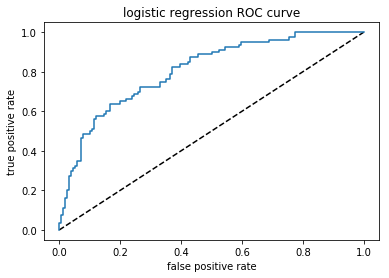

In [23]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
logreg = LogisticRegression()


# Fit the classifier to the training data
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)


from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr, label='logistic regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('logistic regression ROC curve')
plt.show();



In [24]:
# Generate the confusion matrix and classification report
print('confusion matrix',confusion_matrix(y_test, y_pred))
print('#######################')
print('#######################')
print('#######################')
print('#######################')
print('classification report', classification_report(y_test, y_pred))

confusion matrix [[126  25]
 [ 32  48]]
#######################
#######################
#######################
#######################
classification report               precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

   micro avg       0.75      0.75      0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



#### Area under the ROC curve
Larger area under the ROC curve = better model

#### AUC in scikit-learn

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

0.8058774834437087

#### AUC using cross-validation

In [26]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(cv_scores)

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.7987037  0.80777778 0.81962963 0.86622642 0.85037736]


### Hyperparameter tuning
linear regression : choosing parameters
ridge/lasso regression: choosing alpha
k nearest neighbors: choosing n_neighbors
parameters like alpha and k: hyperparameters
hyperparameters cannot be learned by fitting the model

#### Choosing a correct hyperparameter
Try a banch of different hyperparameter values
fit all of them separately
see how well each performs
choose the best performing one
it is essential to use cross-validation

#### Grid search cross-validation
gridsearchCV in scikit-learn

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)
knn_cv.best_params_

{'n_neighbors': 14}

In [29]:
knn_cv.best_score_

0.7578125

#### Exercices   Hyperparameter tuning with GridSearchCV

In [30]:
'''
Hyperparameter tuning with GridSearchCV
Hugo demonstrated how to use to tune the n_neighbors parameter of the 
KNeighborsClassifier() using GridSearchCV on the voting dataset.
You will now practice this yourself, but by using logistic regression
on the diabetes dataset instead!
Like the alpha parameter of lasso and ridge regularization that you saw 
earlier, logistic regression also has a regularization parameter: C
C.
C controls the inverse of the regularization strength, and this is what
you will tune in this exercise. A large C C  can lead to an overfit model,
while a small CC can lead to an underfit model.
The hyperparameter space for CC has been setup for you. Your job is 
to use GridSearchCV and logistic regression to find the optimal C
C
 in this hyperparameter space. The feature array is available as X and
 target variable array is available as y.
You may be wondering why you aren't asked to split the data into
training and test sets. Good observation! Here, we want you to focus
on the process of setting up the hyperparameter grid and performing
grid-search cross-validation. In practice, you will indeed want 
to hold out a portion of your data for evaluation purposes, and you
will learn all about this in the next video!
INSTRUCTIONS
100XP
Import LogisticRegression from sklearn.linear_model and GridSearchCV 
from sklearn.model_selection.
Setup the hyperparameter grid by using c_space as the grid of values 
to tune C  over.
Instantiate a logistic regression classifier called logreg.
Use GridSearchCV with 5-fold cross-validation to tune C
C
:
Inside GridSearchCV(), specify the classifier, parameter grid, and 
number of folds to use.
Use the .fit() method on the GridSearchCV object to fit it to the data X
and y.
Print the best parameter and best score obtained from GridSearchCV by 
accessing the best_params_ and best_score_ attributes of logreg_cv.
'''
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334


C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Hold out set for final evaluation
#### reasoning:
How well can the model perform on never before seen data
Using ALL data for cross-validation is not ideal
Split data into training and hold-out set at the beginning
Perform grid search cross-validation on training set
Choose best hyperparameters and evaluate on hold-out set

### Hold out set in practice I: Classification


In [31]:
#diabetes dataset
diab = pd.read_csv('diabetes.csv')
#train test split
X=diab.drop(['diabetes'], axis=1).values
y=diab['diabetes'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [32]:
'''
Hold-out set in practice I: Classification

You will now practice evaluating a model with tuned hyperparameters on a hold-out set. 
The feature array and target variable array from the diabetes dataset have been pre-loaded
as X and y.
In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether
to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set,
tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using 
GridSearchCV on the training set, and then evaluate its performance against the hold-out set.
INSTRUCTIONS
100XP
Create the hyperparameter grid:
Use the array c_space as the grid of values for 'C'.
For 'penalty', specify a list consisting of 'l1' and 'l2'.
Instantiate a logistic regression classifier.
Create training and test sets. Use a test_size of 0.4 and random_state of 42. In practice,
the test set here will function as the hold-out set.
Tune the hyperparameters on the training set using GridSearchCV with 5-folds. This involves
first instantiating the GridSearchCV object with the correct parameters and then fitting it
to the training data.
Print the best parameter and best score obtained from GridSearchCV by accessing
the best_params_ and best_score_ attributes of logreg_cv.
'''
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Hold out set in practice II: Regression

In [36]:
#gapminder data
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder_tidy.csv')

df_nan=df.fillna(0)
X = df_nan['fertility'].values
y = df_nan['life'].values
# Reshape X and y
X=X.reshape(-1,1)
y=y.reshape(-1,1)


In [37]:
'''
Hold-out set in practice II: Regression
Remember lasso and ridge regression from the previous chapter? Lasso used the L1
L1 penalty to regularize, while ridge used the L2
L2 penalty. There is another type of regularized regression known as the elastic net. 
In elastic net regularization, the penalty term is a linear combination of the L1
L1 and L2 penalties:
a∗L1+b∗L2
In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 
corresponds to an L1 penalty, and anything lower is a combination of L1 and L22

In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model 
trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate
your model's performance.
INSTRUCTIONS
100XP
Import the following modules:
ElasticNet from sklearn.linear_model.
mean_squared_error from sklearn.metrics.
GridSearchCV and train_test_split from sklearn.model_selection.
Create training and test sets, with 40% of the data used for the test set. Use a random
state of 42.
Specify the hyperparameter grid for 'l1_ratio' using l1_space as the grid of values to search
over.
Instantiate the ElasticNet regressor.
Use GridSearchCV with 5-fold cross-validation to tune 'l1_ratio' on the training 
data X_train and y_train. This involves first instantiating the GridSearchCV object 
with the correct parameters and then fitting it to the training data.
Predict on the test set and compute the R2 and mean squared error.
'''
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.6861668663385403
Tuned ElasticNet MSE: 37.92866090863556


In [ ]:
#summary of all libraries use so far:
# Summary
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier

from scipy.stats import randint

## Preprocessing data pipelines

#### DEaling with categorical features
scikit-learn will not accept categorical features by default
need to encode categorical features numerically
convert to 'dummy variables'
0 - Observation was NOT that category
1 - observation was that category

#### dealing with categorical features in Python
scikit-learn: OneHotEncoder()
pandas: get_dummies()


#### Automobile dataset
mpg: target variable  (numerical)
origin: categorical feature (like Country)


#### Encoding dummy variables

In [3]:
import pandas as pd
df = pd.read_csv('auto-short.csv')
print(df.head())

    mpg  cyl  displ   hp  weight  accel  yr  origin
0  18.0    6  250.0   88    3139   14.5  71      US
1   9.0    8  304.0  193    4732   18.5  70      US
2  36.1    4   91.0   60    1800   16.4  78    Asia
3  18.5    6  250.0   98    3525   19.0  77      US
4  34.3    4   97.0   78    2188   15.8  80  Europe


In [4]:
df_origin = pd.get_dummies(df)
print(df_origin.head())

    mpg  cyl  displ   hp  weight  accel  yr  origin_Asia  origin_Europe  \
0  18.0    6  250.0   88    3139   14.5  71            0              0   
1   9.0    8  304.0  193    4732   18.5  70            0              0   
2  36.1    4   91.0   60    1800   16.4  78            1              0   
3  18.5    6  250.0   98    3525   19.0  77            0              0   
4  34.3    4   97.0   78    2188   15.8  80            0              1   

   origin_US  
0          1  
1          1  
2          0  
3          1  
4          0  


In [5]:
df_origin = df_origin.drop('origin_Asia', axis=1)
df_origin.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin_Europe,origin_US
0,18.0,6,250.0,88,3139,14.5,71,0,1
1,9.0,8,304.0,193,4732,18.5,70,0,1
2,36.1,4,91.0,60,1800,16.4,78,0,0
3,18.5,6,250.0,98,3525,19.0,77,0,1
4,34.3,4,97.0,78,2188,15.8,80,1,0


### Linear regression with dummy variables

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X=df_origin.drop(['mpg'], axis=1).values
y=df_origin['mpg'].values

X_train,X_test,y_train,y_test = \
train_test_split(X,y,test_size=0.3, random_state=42) 

ridge = Ridge(alpha=0.5, normalize=True).fit(X_train,y_train)
ridge.score(X_test, y_test)

0.7719998219100824

### Hangling missing data

In [8]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.head()

#see where 0 in insulin and tricepts columns are

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
import numpy as np
#dropping missing data
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [13]:
df=df.dropna()
df.shape

(393, 9)

### Imputing missing data
Making an educated guess about the missing values
Example: Using the mean of the non-missing entries

In [17]:
df = pd.read_csv('diabetes.csv')
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

X=df
X.head(5)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [20]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
X = imp.transform(X)
X_dataframe=pd.DataFrame(X)
X_dataframe.head(5)

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


### Imputing within a pipeline

In [25]:
#read data
df = pd.read_csv('diabetes.csv')
#replace 0 with NaN for pipeline to impute
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

#will predict glucose levels, unfortunatly pretty bad score
X=df.drop(['glucose'], axis=1).values
y=df['glucose'].values

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression

imp = Imputer(missing_values='NaN',strategy='mean', axis=0)
logreg = LogisticRegression()
#imputatiob and logistic regression in one pipeline
steps =  [('imputation', imp),
         ('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train,X_test,y_train,y_test = \
train_test_split(X,y,test_size=0.3, random_state=42) 

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.021645021645021644

### Centering and scaling

#### Why scale your data?
Many models use some form of distance to inform them
features on larger scales can unduly influence the model
example: kNN uses distance explicitly when making predictions
we want features to be on a similar scale
normalizing (or scaling and centering)

#### Ways to normalize your data?
standardization: subtract the mean and divide by variance (result-
all features are centered around zero and have variance one)
can also subtract the minimum and divide by the range (minimum 0 and max 1)
can also normalize so the data ranges from -1 to 1
see scikit-learn docs for further details

#### scaling in scikit-learn


In [36]:
from sklearn.preprocessing import scale
df = pd.read_csv('diabetes.csv')
#replace 0 with NaN for pipeline to impute
df.insulin.replace(0, np.nan, inplace=True)

#will predict glucose levels, unfortunatly pretty bad score
X=df.drop(['insulin'], axis=1).values
x=df['insulin'].values
#print(x)
X_scaled = scale(X)
np.mean(X),np.std(X)


(35.05447607421875, 41.81353903686596)

In [37]:
np.mean(X_scaled), np.std(X_scaled)

(1.0162588363430795e-16, 1.0)

### scaling in a pipeline


In [43]:
#read data
df = pd.read_csv('diabetes.csv')
#replace 0 with NaN for pipeline to impute
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

from sklearn.preprocessing import Imputer
X=df.drop(['diabetes'], axis=1).values

#classification task with KNN - predict diabetes
y=df['diabetes'].values


In [53]:
from sklearn.neighbors import KNeighborsClassifier
imp = Imputer(missing_values='NaN',strategy='mean', axis=0)
# Create a k-NN classifier with 7 neighbors: knn
#knn = KNeighborsClassifier(n_neighbors=7)

from sklearn.preprocessing import StandardScaler
steps =[('imputation', imp),
        ('scaler', StandardScaler()),
       ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

X_train,X_test,y_train,y_test = \
train_test_split(X,y,test_size=0.3, random_state=42) 
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


from sklearn.metrics import classification_report
print('classification report', classification_report(y_test, y_pred))


print('########################')
print(knn_scaled.score(X_test, y_test))

classification report               precision    recall  f1-score   support

           0       0.76      0.74      0.75       151
           1       0.53      0.55      0.54        80

   micro avg       0.68      0.68      0.68       231
   macro avg       0.64      0.65      0.64       231
weighted avg       0.68      0.68      0.68       231

########################
0.6753246753246753


C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [51]:
steps2 =[('imputation', imp),
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps2)

X_train,X_test,y_train,y_test = \
train_test_split(X,y,test_size=0.3, random_state=42) 
knn_unscaled = pipeline.fit(X_train, y_train)
y_pred_unscaled = pipeline.predict(X_test)

#knn_unscaled = KNeighborsClassifier().fit(X_train,y_train)
print('classification report', classification_report(y_test, y_pred_unscaled))
knn_unscaled.score(X_test, y_test)

classification report               precision    recall  f1-score   support

           0       0.78      0.75      0.76       151
           1       0.56      0.60      0.58        80

   micro avg       0.70      0.70      0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



0.696969696969697

### CV (cross validation) and scaling in a pipeline

In [9]:
#libraries
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#DATA
#read data
df = pd.read_csv('diabetes.csv')
#replace 0 with NaN for pipeline to impute
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

# diabetes is a target, so split dataset
X=df.drop(['diabetes'], axis=1).values
y=df['diabetes'].values
#train/test split
#stratify means we keep same proportion of data with diabetes as in initial dataset
X_train,X_test,y_train,y_test = \
train_test_split(X,y,test_size=0.3, random_state=42, stratify=y) 

#imputation of NaNs
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN',strategy='mean', axis=0)


#Pipeline:
# 1.imputation
# 2. scaler
# 3.classification task with KNN - predict diabetes

steps = [('imputation', imp),
         ('scaler', StandardScaler()),
        (('knn', KNeighborsClassifier()))]
pipeline = Pipeline(steps)

#cross validation
#use GridSearchCV to find the optimal value for n_neighbors

#create a dictionary of all values we want to test for n_neighbors
parameters = {'knn__n_neighbors': np.arange(1,50)}

#use gridsearch to test all values for n_neighbors
knn_cv = GridSearchCV(pipeline, param_grid=parameters)
knn_cv.fit(X_train,y_train)

#check top performing n_neighbors value
print(knn_cv.best_params_)

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was 

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecat

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecat

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecat

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecat

{'knn__n_neighbors': 15}


C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecat

#so the best number of neighbors in knn is 15

In [10]:
y_pred=knn_cv.predict(X_test)
print(knn_cv.score(X_test,y_test))

0.7445887445887446


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.51      0.58        81

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



#so with GridSearch KNN improved quality of prediction by 5%

In [14]:
#check first 10 numbers in array, target values
y[0:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [13]:
#show first 5 model predictions on test data
knn_cv.predict(X_test)[0:10]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [15]:
from sklearn.metrics import confusion_matrix
print('confusion matrix',confusion_matrix(y_test, y_pred))

confusion matrix [[131  19]
 [ 40  41]]


high number of false positive and false negative result

### Exercises

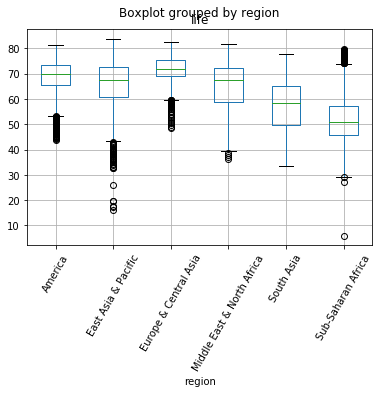

In [18]:
# 01 exploring categorical features - boxplot
'''
Exploring categorical features
The Gapminder dataset that you worked with in previous chapters also contained a categorical 
'Region' feature, which we dropped in previous exercises since you did not have the tools to
deal with it. Now however, you do, so we have added it back in!
Your job in this exercise is to explore this feature. Boxplots are particularly useful for
visualizing categorical features such as this.
INSTRUCTIONS
100XP
Import pandas as pd.
Read the CSV file 'gapminder.csv' into a DataFrame called df.
Use pandas to create a boxplot showing the variation of life expectancy ('life') by region
('Region'). To do so, pass the column names in to df.boxplot() (in that order).
'''

# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder_tidy.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'region', rot=60)

# Show the plot
plt.show()

In [25]:
df.head(3)

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia


In [26]:
upd_new_df = df.sort_values(by=['Country', 'Year'])
upd_new_df['Year'] = upd_new_df['Year'].astype('int64')
final_df = upd_new_df.dropna()
final_df.head(3)

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia


In [56]:
'''
Creating dummy variables
As Andy discussed in the video, scikit-learn does not accept non-numerical features.
You saw in the previous exercise that the 'Region' feature contains very useful information 
that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy
compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, 
it would be preferable to retain the 'Region' feature. To do this, you need to binarize
it by creating dummy variables, which is what you will do in this exercise.
INSTRUCTIONS
100XP
Use the pandas get_dummies() function to create dummy variables from the df DataFrame. 
Store the result as df_region.
Print the columns of df_region. This has been done for you.
Use the get_dummies() function again, this time specifying drop_first=True to drop the 
unneeded dummy variable (in this case, 'Region_America').
Hit 'Submit Answer to print the new columns of df_region and take note of how one column 
was dropped!
'''
# Create dummy variables: df_region
df_region = pd.get_dummies(final_df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['Year', 'fertility', 'life', 'population', 'child_mortality', 'gdp',
       'Country_Afghanistan', 'Country_Albania', 'Country_Algeria',
       'Country_Angola',
       ...
       'Country_Vietnam', 'Country_West Bank and Gaza', 'Country_Zambia',
       'Country_Zimbabwe', 'region_America', 'region_East Asia & Pacific',
       'region_Europe & Central Asia', 'region_Middle East & North Africa',
       'region_South Asia', 'region_Sub-Saharan Africa'],
      dtype='object', length=190)
Index(['Year', 'fertility', 'life', 'population', 'child_mortality', 'gdp',
       'Country_Albania', 'Country_Algeria', 'Country_Angola',
       'Country_Antigua and Barbuda',
       ...
       'Country_Western Sahara', 'Country_Yemen, Rep.', 'Country_Zambia',
       'Country_Zimbabwe', 'Country_Åland', 'region_East Asia & Pacific',
       'region_Europe & Central Asia', 'region_Middle East & North Africa',
       'region_South Asia', 'region_Sub-Saharan Africa'],
      dtype='object', length=214)

In [57]:
df_region.head(3)

,Year,fertility,life,population,child_mortality,gdp,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,...,Country_Western Sahara,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe,Country_Åland,region_East Asia & Pacific,region_Europe & Central Asia,region_Middle East & North Africa,region_South Asia,region_Sub-Saharan Africa
0,1964,7.671,33.639,10474903.0,339.7,1182.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1965,7.671,34.152,10697983.0,334.1,1182.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1966,7.671,34.662,10927724.0,328.7,1168.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Columns: 214 entries, Year to region_Sub-Saharan Africa
dtypes: float64(5), int64(1), uint8(208)
memory usage: 2.5 MB


In [59]:
df_region.isnull().sum()

Year                                    0
fertility                              11
life                                    0
population                              3
child_mortality                       901
gdp                                  1111
Country_Albania                         0
Country_Algeria                         0
Country_Angola                          0
Country_Antigua and Barbuda             0
Country_Argentina                       0
Country_Armenia                         0
Country_Aruba                           0
Country_Australia                       0
Country_Austria                         0
Country_Azerbaijan                      0
Country_Bahamas                         0
Country_Bahrain                         0
Country_Bangladesh                      0
Country_Barbados                        0
Country_Belarus                         0
Country_Belgium                         0
Country_Belize                          0
Country_Benin                     

In [60]:
'''
Regression with categorical features
Having created the dummy variables from the 'Region' feature, you can build regression 
models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.
The feature array X and target variable array y have been pre-loaded.
INSTRUCTIONS
100XP
Import Ridge from sklearn.linear_model and cross_val_score from sklearn.model_selection.
Instantiate a ridge regressor called ridge with alpha=0.5 and normalize=True.
Perform 5-fold cross-validation on X and y using the cross_val_score() function.
Print the cross-validated scores.
'''
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

#imputation removing NaN
df_region.fillna(df_region.mean(), inplace=True)
#df_region.apply(lambda x: x.fillna(x.mean()),axis=0)

X=df_region.drop(['life'], axis=1).values
y=df_region['life'].values



In [61]:
print(y)

[33.639 34.152 34.662 ... 79.88  80.    80.1  ]


In [62]:
print(X)

[[1.96400000e+03 7.67100000e+00 1.04749030e+07 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.96500000e+03 7.67100000e+00 1.06979830e+07 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.96600000e+03 7.67100000e+00 1.09277240e+07 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [2.00400000e+03 4.02871876e+00 2.65300000e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00500000e+03 4.02871876e+00 2.67660000e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.00600000e+03 4.02871876e+00 2.69230000e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [63]:
X.shape

(10111, 213)

In [64]:
y.shape

(10111,)

In [65]:
# Instantiate a ridge regressor: ridge
ridge = Ridge(normalize=True, alpha=0.5)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.76927173 0.82143493 0.77342361 0.79407263 0.73839261]


In [66]:
'''
Dropping missing data
The voting dataset from Chapter 1 contained a bunch of missing values that we dealt with
for you behind the scenes. Now, it's time for you to take care of these yourself!
The unprocessed dataset has been loaded into a DataFrame df. Explore it in the IPython Shell
with the .head() method. You will see that there are certain data points labeled with a '?'.
These denote missing values. As you saw in the video, different datasets encode missing values 
in different ways. Sometimes it may be a '9999', other times a 0 - real-world data can be
very messy! If you're lucky, the missing values will already be encoded as NaN. We use NaN 
because it is an efficient and simplified way of internally representing missing data, 
and it lets us take advantage of pandas methods such as .dropna() and .fillna(), as well 
as scikit-learn's Imputation transformer Imputer().
In this exercise, your job is to convert the '?'s to NaNs, and then drop the rows that 
contain them from the DataFrame.
INSTRUCTIONS
100XP
Explore the DataFrame df in the IPython Shell. Notice how the missing value is represented.
Convert all '?' data points to np.nan.
Count the total number of NaNs using the .isnull() and .sum() methods. This has been done 
for you.
Drop the rows with missing values from df using .dropna().
Hit 'Submit Answer' to see how many rows were lost by dropping the missing values.
'''

df = pd.read_csv('party_csv2.csv')
df.head(3)

# Convert '?' to NaN
df[df == '?'] = np.NaN

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party        0
infants      0
water        0
budget       0
physician    0
salvador     0
religious    0
dtype: int64
Shape of Original DataFrame: (50, 7)
Shape of DataFrame After Dropping All Rows with Missing Values: (50, 7)


C:\Users\dave_\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [ ]:
'''
Imputing missing data in a ML Pipeline I
As you've come to appreciate, there are many steps to building a model, from creating 
training and test sets, to fitting a classifier or regressor, to tuning its parameters,
to evaluating its performance on new data. Imputation can be seen as the first step of this
machine learning process, the entirety of which can be viewed within the context of a pipeline.
Scikit-learn provides a pipeline constructor that allows you to piece together these steps
into one process and thereby simplify your workflow.
You'll now practice setting up a pipeline with two steps: the imputation step, followed by
the instantiation of a classifier. You've seen three classifiers in this course so far:
k-NN, logistic regression, and the decision tree. You will now be introduced to a
fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it 
works under the hood. It works exactly as you would expect of the scikit-learn estimators
that you have worked with previously, in that it has the same .fit() and .predict() methods
as before.
INSTRUCTIONS
100XP
Import Imputer from sklearn.preprocessing and SVC from sklearn.svm. SVC stands for 
Support Vector Classification, which is a type of SVM.
Setup the Imputation transformer to impute missing data (represented as 'NaN') with the 
'most_frequent' value in the column (axis=0).
Instantiate a SVC classifier. Store the result in clf.
Create the steps of the pipeline by creating a list of tuples:
The first tuple should consist of the imputation step, using imp.
The second should consist of the classifier.
'''
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

SVC is a classifier so will not support continous values in targets. What you need is SVR. Just replace all occurences of SVC with SVR and you are good to go.

In [72]:
'''
Imputing missing data in a ML Pipeline II
Having setup the steps of the pipeline in the previous exercise, you will now use it on the
voting dataset to classify a Congressman's party affiliation. What makes pipelines so 
incredibly useful is the simple interface that they provide. You can use the .fit() and
.predict() methods on pipelines just as you did with your classifiers and regressors!
Practice this for yourself now and generate a classification report of your predictions. 
The steps of the pipeline have been set up for you, and the feature array X and target
variable array y have been pre-loaded. Additionally, train_test_split and
classification_report have been imported from sklearn.model_selection and sklearn.metrics 
respectively.
INSTRUCTIONS
100XP
Import the following modules:
Imputer from sklearn.preprocessing and Pipeline from sklearn.pipeline.
SVC from sklearn.svm.
Create the pipeline using Pipeline() and steps.
Create training and test sets. Use 30% of the data for testing and a random state of 42.
Fit the pipeline to the training set and predict the labels of the test set.
Compute the classification report.
'''
#read data
df = pd.read_csv('diabetes.csv')
#replace 0 with NaN for pipeline to impute
df.insulin.replace(0, np.nan, inplace=True)
df.triceps.replace(0, np.nan, inplace=True)
df.bmi.replace(0, np.nan, inplace=True)

from sklearn.preprocessing import Imputer
X=df.drop(['diabetes'], axis=1).values

#classification task - predict diabetes
y=df['diabetes'].values

# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC  #for classification
from sklearn.svm import SVR #regressor for continuos ordered variables

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVC', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
#print(classification_report(y_test, y_pred))

C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\dave_\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
'''
Centering and scaling your data
In the video, Hugo demonstrated how significantly the performance of a
model can improve if the features are scaled. Note that this is not 
always the case: In the Congressional voting records dataset, for example,
all of the features are binary. In such a situation, scaling will have 
minimal impact.
You will now explore scaling for yourself on a new dataset - White Wine 
Quality! Hugo used the Red Wine Quality dataset in the video. We have 
used the 'quality' feature of the wine to create a binary target variable:
If 'quality' is less than 5, the target variable is 1, and otherwise,
it is 0.
The DataFrame has been pre-loaded as df, along with the feature and target 
variable arrays X and y. Explore it in the IPython Shell. Notice
how some features seem to have different units of measurement. 
'density', for instance, only takes values between 0 and 1, while 
'total sulfur dioxide' has a maximum value of 289. As a result,
it may be worth scaling the features here. Your job in this exercise 
is to scale the features and compute the mean and standard deviation
of the unscaled features compared to the scaled features.
INSTRUCTIONS
100XP
Import scale from sklearn.preprocessing.
Scale the features X using scale().
Print the mean and standard deviation of the unscaled features X, 
and then the scaled features X_scaled. Use the numpy functions np.mean() 
and np.std() to compute the mean and standard deviations.
'''
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

In [ ]:
'''
Centering and scaling in a pipeline
With regard to whether or not scaling is effective, the proof is in the
pudding! See for yourself whether or not scaling the features of the
White Wine Quality dataset has any impact on its performance. 
You will use a k-NN classifier as part of a pipeline that includes
scaling, and for the purposes of comparison, a k-NN classifier
trained on the unscaled data has been provided.
The feature array and target variable array have been pre-loaded as X 
and y. Additionally, KNeighborsClassifier and train_test_split 
have been imported from sklearn.neighbors and sklearn.model_selection, 
respectively.
INSTRUCTIONS
100XP
Import the following modules:
StandardScaler from sklearn.preprocessing.
Pipeline from sklearn.pipeline.
Complete the steps of the pipeline with StandardScaler() for 'scaler'
and KNeighborsClassifier() for 'knn'.
Create the pipeline using Pipeline() and steps.
Create training and test sets, with 30% used for testing. Use a random
state of 42.
Fit the pipeline to the training set.
Compute the accuracy scores of the scaled and unscaled models by using
the .score() method inside the provided print() functions.
'''
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

In [ ]:
'''
Bringing it all together I: Pipeline for classification
It is time now to piece together everything you have learned so far into 
a pipeline for classification! Your job in this exercise is to build a 
pipeline that includes scaling and hyperparameter tuning to classify 
wine quality.
You'll return to using the SVM classifier you were briefly introduced to 
earlier in this chapter. The hyperparameters you will tune are C
C and gamma.C controls the regularization strength. It is analogous 
to the C you tuned for logistic regression in Chapter 3, while gamma
controls the kernel coefficient: Do not worry about this now as it is 
beyond the scope of this course.
The following modules have been pre-loaded: Pipeline, svm, train_test_split,
GridSearchCV, classification_report, accuracy_score. The feature and target
variable arrays X and y have also been pre-loaded.
INSTRUCTIONS
100XP
Setup the pipeline with the following steps:
Scaling, called 'scaler' with StandardScaler().
Classification, called 'SVM' with SVC().
Specify the hyperparameter space using the following notation:
'step_name__parameter_name'. Here, the step_name is SVM, and the
parameter_names are C and gamma.
Create training and test sets, with 20% of the data used for the test set.
Use a random state of 21.
Instantiate GridSearchCV with the pipeline and hyperparameter space and
fit it to the training set. Use 3-fold cross-validation (This is the
default, so you don't have to specify it).
Predict the labels of the test set and compute the metrics. The metrics
have been computed for you.
'''
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

In [ ]:
'''
Bringing it all together II: Pipeline for regression
For this final exercise, you will return to the Gapminder dataset.
Guess what? Even this dataset has missing values that we dealt with 
for you in earlier chapters! Now, you have all the tools to take care
of them yourself!
Your job is to build a pipeline that imputes the missing data, scales 
the features, and fits an ElasticNet to the Gapminder data. You will
then tune the l1_ratio of your ElasticNet using GridSearchCV.
All the necessary modules have been imported, and the feature and 
target variable arrays have been pre-loaded as X and y.
INSTRUCTIONS
100XP
Set up a pipeline with the following steps:
'imputation', which uses the Imputer() transformer and the 'mean'
strategy to impute missing data ('NaN') using the mean of the column.
'scaler', which scales the features using StandardScaler().
'elasticnet', which instantiates an ElasticNet regressor.
Specify the hyperparameter space for the l1
 ratio using the following notation: 'step_name__parameter_name'. 
 Here, the step_name is elasticnet, and the parameter_name is l1_ratio.
Create training and test sets, with 40% of the data used for the test set.
Use a random state of 42.
Instantiate GridSearchCV with the pipeline and hyperparameter space.
Use 3-fold cross-validation (This is the default, so you don't have
to specify it).
Fit the GridSearchCV object to the training set.
Compute R2 and the best parameters. This has been done for you, 
 so hit 'Submit Answer' to see the results!
 '''
 # Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))